In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

# from google.colab import drive
# drive.mount('/content/drive')

#Ley de los grandes números

Si tomas una **muestra aleatoria de tamaño $n$** de una población con media $μ$ (conocida o desconocida), y calculas el promedio de la muestra (llamado media muestral, $\bar{X_n}$), entonces, a medida que **$n$ crece** (es decir, el tamaño de la muestra se hace más grande), el valor de **$\bar{X_n}$ ​se acerca cada vez más a la media poblacional $μ$**.

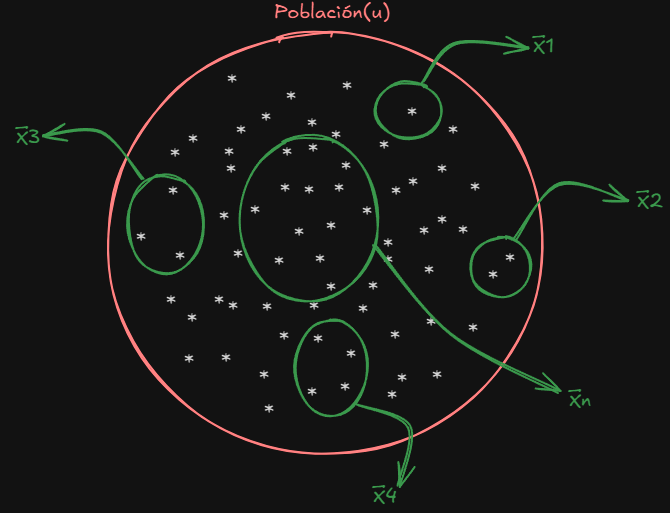

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, stats

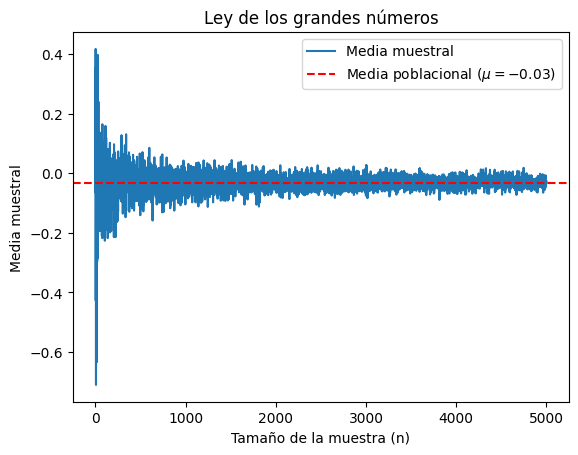

In [3]:
population_lgn = np.random.normal(loc=0, scale=1, size=2000)
population_lgn_mean = np.mean(population_lgn)
n_max = 5000
n_min = 1
means_lgn = np.empty(n_max - n_min)

for n in range(n_min, n_max):
  sample_lgn = np.random.choice(population_lgn, size=n, replace=True)
  means_lgn[n-n_min]= np.mean(sample_lgn)

plt.plot(range(n_min, n_max), means_lgn, label='Media muestral')
plt.axhline(population_lgn_mean, color='red', linestyle='--', label=f'Media poblacional ($\mu = {population_lgn_mean:.2f}$)')
plt.xlabel("Tamaño de la muestra (n)")
plt.ylabel("Media muestral")
plt.title("Ley de los grandes números")
plt.legend()
plt.show()

#Teorema del límite central

El **Teorema del Límite Central** establece que si se toman muestras aleatorias de tamaño fijo $n$ de una población con una media $\mu$ y una varianza $\sigma^2$ finita, y se calcula la media de cada muestra, la distribución de estas medias muestrales tenderá a seguir una **distribución normal (o gaussiana)** a medida que el tamaño de la muestra $n$ aumenta, independientemente de la forma de la distribución original de la población.

En otras palabras:





* Si $X_1, X_2, \dots, X_n$ son variables aleatorias independientes e idénticamente distribuidas (i.i.d.) con media $\mu$ y varianza $\sigma^2$,
*   Entonces, la **media muestral** $\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$
tendrá una distribución que se aproxima a una **normal** con media $\mu$ y varianza $\frac{\sigma^2}{n}$ cuando $n$ es suficientemente grande.





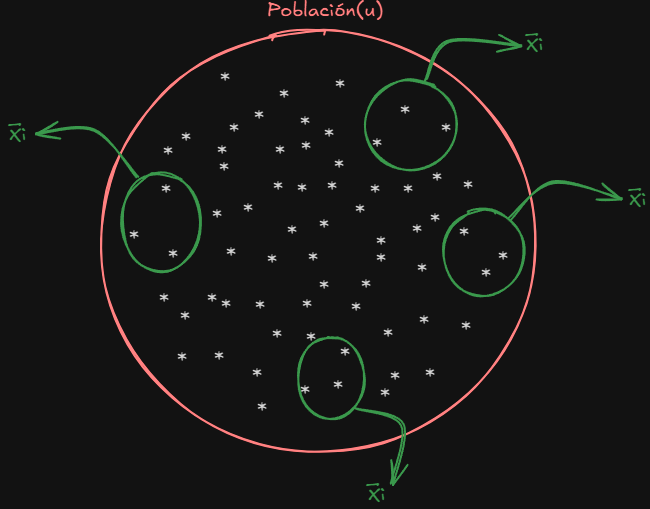

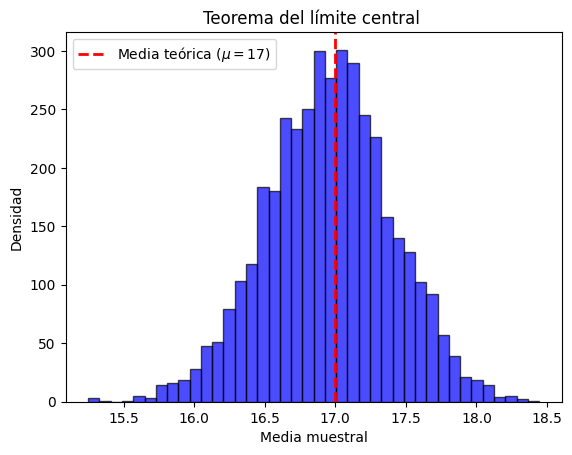

In [4]:
mu_ctl = 17
std_ctl = 2.34

population_ctl = np.random.normal(loc=mu_ctl, scale=std_ctl, size=2000)

n = 30
num_experimentos = 4000

means_ctl = np.empty(num_experimentos)


for i in range(num_experimentos):
    sample_ctl = np.random.choice(population_ctl, size=n, replace=True)
    means_ctl[i] = np.mean(sample_ctl)

plt.hist(means_ctl, bins=40, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mu_ctl, color='red', linestyle='dashed', linewidth=2, label=f'Media teórica ($\mu = {mu_ctl}$)')
plt.title('Teorema del límite central ')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#Prueba de hipótesis

##Hipótesis

Una hipótesis estadística es un enunciado acerca de los parámetros de una o más poblaciónes.

La hipótesis nula denotada por $H_o$, es aquella que inicialmente se supone cierta. La hipótesis alternativa denotada por $H_a$, es la aseveración contradictoria a $H_o$.

La **prueba de hipótesis** es un procedimiento estadístico que nos permite tomar decisiones o hacer inferencias sobre una población, basándose en la información proporcionada por una muestra. Consiste en evaluar dos hipótesis opuestas (la **hipótesis nula** ($H_o$) y la **hipótesis alternativa** ($H_a$)) para determinar si hay evidencia suficiente en los datos muestrales para rechazar la hipótesis nula en favor de la alternativa.


##Probabilidad de cometer errores en la prueba de hipótesis


$α$ = P(Error tipo I) = P(Rechazar $H_o$ cuando $H_o$ es verdadera)

$β$ = P(Error tipo II) = P(No rechazar $H_o$ cuando $H_o$ es falsa)

##Nivel de significancia($\alpha$)

Es la **probabilidad de rechazar** la hipótesis nula cuando es verdadera (Error tipo I)

*Este valor se busca directamente en la distribución normal o t-Student* y **algunas veces debe ajustarse dependiendo del planteamiento de las hipótesis**

## Valor o punto crítico($Z_α$)

El valor crítico es un **valor en la distribución de referencia** (la distribución normal o t-Student) que **separa la región de rechazo de la región de no rechazo** de la hipótesis nula. Dependiendo del tipo de prueba (una cola o dos colas), el valor crítico puede ser **positivo, negativo o ambos.**

_Es el resultado de buscar el nivel de significancia en la distribución de referencia_

##Planteamiento de hipótesis

Usualmente, la **hipótesis nula** se plantea como una igualdad:
$$H_o: \mu = 50$$
En contra parte, para la **hipótesis alterna** se presentan tres casos dependiendo del problema:
$$H_a:$$
*   $\mu > 50$ (Cola superior)(Se toma el **valor de significancia** tal cual **$α$** y el **valor crítico positivo(+$Z_α$**)
*   $\mu < 50$ (Cola inferior)(Se toma el **valor de significancia** tal cual **$α$** y el **valor crítico negativo(-$Z_α$)**)
*   $\mu \neq 50$ (Dos colas)(Se toma el **valor de significancia** como la mitad del original **$α/2$** y ahora serán **dos valores criticos, uno positivo(+$Z_{α/2}$) y otro negativo(-$Z_{α/2}$)**)

**NOTA:** Cuando la hipótesis nula no es una igualdad, la alterna siempre será lo contrario




##P-valor

El valor \( P-valor \) es el **nivel de significancia más pequeño para el cual se rechazaría la hipótesis nula** ( $H_0$ ) con los datos dados.

Se rechaza \($H_0$\) si:

$$
p \leq \alpha
$$

y no se rechaza \( $H_0$ \) si:

$$
p > \alpha
$$


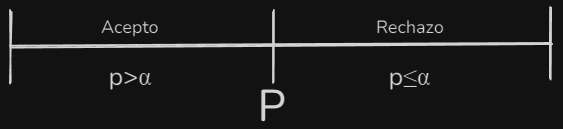

Si bien el cálculo **estadistico de prueba**($Z_0$) cambia dependiendo si la prueba es de una o dos muestras o si la varianza es conocida o desconocida. La forma de calcular el P-valor ya esta definida por:

$$ P =
\begin{cases}
    2(1 - \phi(|Z_0|)) & \textit{Dos colas} \\
    1 - \phi(Z_0) & \textit{cola superior} \\
    \phi(Z_0) & \textit{cola inferior}
\end{cases} $$

##Intervalos de confianza

Un intervalo de confianza es un **rango de valores**, calculado a partir de una muestra, que probablemente contenga el valor verdadero de un parámetro poblacional. Este rango **tiene un nivel de confianza asociado**, que i**ndica la probabilidad de que el intervalo contenga el parámetro**.


$$
\begin{aligned}
    l \leq \mu \leq u \quad & P(l \leq \mu \leq u) = 1 - \alpha \quad (\textit{dos colas}) \\
    l \leq \mu \quad & P(l \leq \mu) = 1 - \alpha \quad (\textit{cola inferior}) \\
    \mu \leq u \quad & P(\mu \leq u) = 1 - \alpha \quad (\textit{cola superior})
\end{aligned}
$$

El cálculo de $l$ y $u$ varia acorde a si la prueba es de una muestra o dos o si es con varianza concida o desconocida.

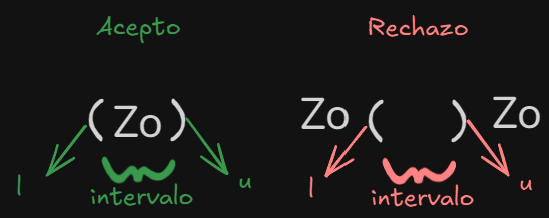

## Nivel de confianza



$$ Nivel \ de \ confianza =(1 - \alpha) $$

Es la probabilidad de que el intervalo contenga el parámetro poblacional. Por ejemplo, un nivel de confianza del 95%

$$ \alpha = 0.05 (5\%)$$

significa que, si repitiéramos el muestreo muchas veces, el **95%** de los intervalos contendrían el valor verdadero del parámetro. Mientras que en un **5%** no contendria el valor.

**NOTA:** $α$ es lo que se busca en la **distribución de referencia** para ese nivel de confianza asociado.


##Potencia

La potencia de una prueba estadística es la probabilidad de rechazar la hipótesis nula $Ho$ cuando la hipótesis alternativa es verdadera. Se calcula como 1 - $β$. Puede interpretarse como rechazar correctamente una hipótesis nula falsa

#Prueba de hipótesis para una muestra con varianza conocida ($σ$)

In [5]:
#@title codigo
def prueba_hipotesis_completa(x_barra, mu_0, sigma, n, alpha, cola, x_sup):
    Z = (x_barra - mu_0) / (sigma / np.sqrt(n))
    x = np.linspace(-20, 20, 1000)
    y = norm.pdf(x, 0, 1)


    if cola == 'inf':
      z = norm.ppf(alpha)
      if Z < z:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('punto crítico', z)

      p = norm.cdf(Z)
      print('p-valor:', p)

      beta = 1 - norm.cdf(z - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta:', beta)

      cota_superior = x_barra + z * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x <= z), color='red')
      plt.axvline(z, color='black', linestyle='dotted')
      plt.axvline(Z, color='green', linestyle='--')


    if cola == 'sup':
      z = norm.ppf(1-alpha)
      if Z > z:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('punto crítico', z)

      p = 1 - norm.cdf(Z)
      print('p-valor', p)

      beta = norm.cdf(z - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta', beta)

      cota_superior = x_barra + z * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.5)
      plt.axvline(z, color='black', linestyle='dotted')
      plt.axvline(Z, color='green', linestyle='--')

    if cola == 'dos':
      z_medio = norm.ppf(1 - alpha / 2)
      if abs(Z) > z_medio:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('puntos críticos', -z_medio, z_medio)

      p = 2 * (1 - norm.cdf(abs(Z)))
      print('p-valor', p)

      beta = norm.cdf(z_medio - (x_sup - mu_0)/(sigma/np.sqrt(n))) - norm.cdf(-z_medio - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta', beta)

      cota_superior = x_barra + z_medio * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z_medio * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x <= -z_medio), color='red', alpha=0.5)
      plt.fill_between(x, y, where=(x >= z_medio), color='red', alpha=0.5)
      plt.axvline(Z, color='green', linestyle='--')
      plt.axvline(-z_medio, color='black', linestyle='dotted')
      plt.axvline(z_medio, color='black', linestyle='dotted')
      plt.axvline(-z_medio, color='black', linestyle='dotted')
      plt.axvline(z_medio, color='black', linestyle='dotted')

    print('estadístico', Z)
    plt.show()

##Estadístico de prueba($Z_0$)

Definido por:
$$Z_0=\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$$

donde:
*   $\bar{X}$: Es la media muestral
*   $\mu_0$: Es el valor que supone la hipótesis
*   $\sigma$: Es la desviación estándar poblacional
*   $n$: Es el tamaño de la muestra  




##Intervalos de confianza



*   Dos colas
$$\bar{X}-\frac{Z_{\alpha/2}\sigma}{\sqrt{n}}≤\mu≤\bar{X}+\frac{Z_{\alpha/2}\sigma}{\sqrt{n}}$$
*   Cola superior
$$\mu≤\bar{X}+\frac{Z_\alpha\sigma}{\sqrt{n}}$$
*   Cola inferior
$$\bar{X}-\frac{Z_\alpha\sigma}{\sqrt{n}}≤\mu$$




##Error tipo II $(β)$

Supongase que tengo el siguiente planteamiento de hipótesis nula:
$$H_0:\mu =\mu_0 \$$

*   Dos colas ($H_a:\mu \neq \mu_o$)
$$β(\mu)=\phi(Z_{α/2}-\frac{\mu-\mu_0}{σ}\sqrt{n})-\phi(-Z_{α/2}-\frac{\mu-\mu_0}{σ}\sqrt{n})$$
*   Cola superior  ($H_a:\mu > \mu_o$)
$$β(\mu)=\phi(Z_{α/2}-\frac{\mu-\mu_0}{σ}\sqrt{n})$$
*   Cola inferior ($H_a:\mu < \mu_o$)
$$β(\mu)=1-\phi(-Z_{α/2}-\frac{\mu-\mu_0}{σ}\sqrt{n})$$




#Prueba de hipótesis para una muestra con varianza desconocida (S)

Para este caso lo único que cambia es la forma en que se calcula el estadístico de prueba $Z_0$ o como se utiliza la distribución t-Student $T_0$ (**El resto de calculos se hace igual que para la prueba de hipótesis para una muestra con varianza conocida**):

$$Z_0=\frac{\bar{X}-\mu_0}{S/\sqrt{n}}$$

$$T_0=\frac{\bar{X}-\mu_0}{S/\sqrt{n}} \ con \ v=n-1 \ grados \ de \ libertad$$

**NOTA:** Si bien puede elegir entre trabajar con la normal o con t-Student, debe mantenerse fiel a su distribución de referencia y mapear todos los valores a esta.

#Prueba de hipótesis para dos muestras con varianza conocida ($σ$)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def prueba_hipotesis_2muestrasZ(x_barra1, x_barra2, var1, var2, n1, n2, alpha, cola, delta=0):
    sigma = np.sqrt((var1 / n1) + (var2 / n2))
    Z = (x_barra1 - x_barra2 - delta) / sigma
    x = np.linspace(-10, 10, 1000)
    y = norm.pdf(x, 0, 1)

    if cola == 'inf':
        z = norm.ppf(alpha)
        if Z < z:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Punto crítico:', z)

        p = norm.cdf(Z)
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z * sigma
        cota_inferior = (x_barra1 - x_barra2) - z * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x <= z), color='red', alpha=0.5)
        plt.axvline(z, color='black', linestyle='dotted')
        plt.axvline(Z, color='green', linestyle='--')

    elif cola == 'sup':
        z = norm.ppf(1 - alpha)
        if Z > z:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Punto crítico:', z)

        p = 1 - norm.cdf(Z)
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z * sigma
        cota_inferior = (x_barra1 - x_barra2) - z * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.5)
        plt.axvline(z, color='black', linestyle='dotted')
        plt.axvline(Z, color='green', linestyle='--')

    elif cola == 'dos':
        z_medio = norm.ppf(1 - alpha / 2)
        if abs(Z) > z_medio:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Puntos críticos:', -z_medio, z_medio)

        p = 2 * (1 - norm.cdf(abs(Z)))
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z_medio * sigma
        cota_inferior = (x_barra1 - x_barra2) - z_medio * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x <= -z_medio), color='red', alpha=0.5)
        plt.fill_between(x, y, where=(x >= z_medio), color='red', alpha=0.5)
        plt.axvline(Z, color='green', linestyle='--')
        plt.axvline(-z_medio, color='black', linestyle='dotted')
        plt.axvline(z_medio, color='black', linestyle='dotted')

    print('Estadístico:', Z)
    plt.show()


Continuamos con las pruebas de hipótesis, pero tomando dos muestras aleatorias
 $n_1$ y $n_2$ provenientes de dos
distribuciones normales independientes (si no lo son, se deben cumplir las condiciones del teorema de límite central)
con medias $\mu_1$ y $\mu_2$ varianzas $σ_1^2$ y $σ_2^2$.

##Planteamiento de hipótesis


Se desea probrar la hipótesis nula:
$$H_0:\mu_1-\mu_2=\delta_0$$
contra una de siguientes hipótesis alternativas

*   $H_a:\mu_1-\mu_2 \neq δ_0$ (dos colas)
*   $H_a:\mu_1-\mu_2 > δ_0$ (cola superior)
*   $H_a:\mu_1-\mu_2 < δ_0$ (cola inferior)

NOTA: $δ_0$ **es una cantidad que toma positivos o cero** y
la cual representa la diferencia propuesta entre
los valores desconocidos de las medias.




##Estadístico de prueba($Z_0$)

$$Z_0= \frac{\bar{X}-\bar{Y}-(\mu_1-\mu_2)}{\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}}$$

Donde:


*   $\bar{X}$ es la media muestral de la población 1.
*   $\bar{Y}$ es la media muestrañ de la población 2.

NOTA: Obsérvese que el término $(\mu_1-\mu_2)$ puede ser sustituido por $δ_0$



##Intervalos de confianza



*   Dos colas
$$\bar{x_1}-\bar{x_2}-Z_{α/2}\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}≤μ_1-μ_2≤\bar{x_1}-\bar{x_2}+Z_{α/2}\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}$$
*   Cola superior
$$μ_1-μ_2≤\bar{x_1}-\bar{x_2}+Z_{α/2}\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}$$
*   Cola inferior
$$\bar{x_1}-\bar{x_2}-Z_{α/2}\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}≤μ_1-μ_2$$


##Error tipo II $(β)$

Asuma que $δ$ es la verdadera diferencias entre las medias de intéres.



*   Dos colas
$$β(δ)=\phi(Z_{α/2}-\frac{δ-δ_0}{\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}})-\phi(-Z_{α/2}-\frac{δ-δ_0}{\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}})$$
*   Cola superior
$$β(δ)=\phi(Z_{α/2}-\frac{δ-δ_0}{\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}})$$
*   Cola inferior
$$β(δ)=1-\phi(-Z_{α/2}-\frac{δ-δ_0}{\sqrt{\frac{σ^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}})$$




#Prueba de hipótesis para dos muestras con varianza desconocida (S)

In [7]:
def prueba_hipotesis_2muestrasT(x_barra1, x_barra2, var1, var2, n1, n2, alpha, cola, delta=0, var='iguales'):
  if var == 'iguales':
    v = n1 + n2 -2
    Sp = np.sqrt(((n1 - 1)*var1 + (n2 - 1)*var2)/v)
    sigma = Sp*np.sqrt((1/n1) + (1/n2))
    print('varianza combinada', Sp**2, 'grados de libertad', v)
  if var == 'distinta':
    v = (var1/n1 + var2/n2)**2 / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
    sigma = np.sqrt((var1/n1) + (var2/n2))
    print('grados de libertad', v)

  T = (x_barra1 - x_barra2 - delta) / sigma
  x = np.linspace(-10, 10, 1000)
  y = norm.pdf(x, 0, 1)

  if cola == 'inf':
    t = stats.t.ppf(alpha, v)
    if T < t:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('punto crítico:', t)

    p = norm.cdf(T)
    print('p-valor:', p)

    cota_superior = (x_barra1 - x_barra2) + t * sigma
    cota_inferior = (x_barra1 - x_barra2) - t * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x <= t), color='red')
    plt.axvline(t, color='black', linestyle='dotted')
    plt.axvline(T, color='green', linestyle='--')

  if cola == 'sup':
    t = stats.t.ppf(1 - alpha, v)
    if T > t:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('punto crítico:', t)


    p_valor = 1 - norm.cdf(T)
    print('p-valor:', p_valor)

    cota_superior = (x_barra1 - x_barra2) + t * sigma
    cota_inferior = (x_barra1 - x_barra2) - t * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x >= t), color='red', alpha=0.5)
    plt.axvline(t, color='black', linestyle='dotted')
    plt.axvline(T, color='green', linestyle='--')


  if cola == 'dos':
    t_medio = stats.t.ppf(1 - alpha / 2, v)
    if abs(T) > t_medio:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('puntos críticos', -t_medio, t_medio)

    p = 2 * (1 - norm.cdf(abs(T)))
    print('p-valor', p)

    cota_superior = (x_barra1 - x_barra2) + t_medio * sigma
    cota_inferior = (x_barra1 - x_barra2) - t_medio * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x <= -t_medio), color='red', alpha=0.5)
    plt.fill_between(x, y, where=(x >= t_medio), color='red', alpha=0.5)
    plt.axvline(T, color='green', linestyle='--')
    plt.axvline(-t_medio, color='black', linestyle='dotted')
    plt.axvline(t_medio, color='black', linestyle='dotted')

  print('Estadístico:', T)
  plt.show()

Para la prueba de hipótesis con dos muestras y varianza desconocida se presentan dos casos:

##Caso 1

Suponemos que las varianzas poblacionales son desconocidas, pero iguales $σ^2_1=σ^2_2=σ^2$

###Estadístico de prueba

$$T_0=\frac{\bar{X}-\bar{Y}-(μ_1-μ_2)}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$
con $v=n_1+n_2-2$ grados de libertad y donde $S_p$ es el estimador combinado de $σ^2$ y esta dado por:

$$S^2_p=\frac{(n_1-1)S^2_1+(n_2-1)S^2_2}{n_1+n_2-2}$$

##Caso 2

Suponemos que las varianzas poblacionales son desconocidas, pero distintas  $σ^2_1\neqσ^2_2$

###Estadístico de prueba

$$T_0=\frac{\bar{X}-\bar{Y}-(μ_1-μ_2)}{\sqrt{\frac{S_1^2}{n_1}+\frac{S_2^2}{n_2}}}$$

Con los grados de libertad dados por:
$$v=\frac{(\frac{S_1^2}{n_1}+\frac{S_2^2}{n_2})^2}{\frac{(S_1^2/n_1)^2}{n_1-1}+\frac{(S_2^2/n_2)^2}{n_2-1}}$$

NOTA: Si $v$ no es entero, **se toma el entero más
próximo** a $v$.

# Ejercicios

In [8]:
import scipy.stats as stats

# Parámetros
t_obs = 2.467  # Estadístico de prueba observado
df = 71       # Grados de libertad

# Cálculo del p-valor bilateral
2*(1-stats.t.cdf(t_obs, df))


0.016039339914869943

In [9]:
df = 23
alpha = 0.05

# Cálculo del valor crítico t
stats.t.ppf(1 - alpha / 2, df)

2.0686576104190406

In [10]:
import scipy.stats as stats

# Datos del problema
n1, x1, s1 = 35, 120, 15
n2, x2, s2 = 40, 110, 20
alpha = 0.05  # Nivel de significancia

# Paso 1: Calcular el estadístico t
numerador = x1 - x2
denominador = (s1**2 / n1) + (s2**2 / n2)
t_calculado = numerador / (denominador ** 0.5)

# Paso 2: Calcular los grados de libertad con la corrección de Welch
df_num = (denominador) ** 2
df_den = ((s1**2 / n1) ** 2) / (n1 - 1) + ((s2**2 / n2) ** 2) / (n2 - 1)
df = df_num / df_den

# Paso 3: Encontrar el valor crítico t
t_critico = stats.t.ppf(1 - alpha / 2, df)

# Paso 4: Comparar con el estadístico calculado
print(f"Grados de libertad aproximados: {df:.4f}")
print(f"Valor crítico de t: ±{t_critico:.4f}")
print(f"Valor calculado de t: {t_calculado:.4f}")

# Paso 5: Conclusión
if abs(t_calculado) > t_critico:
    print("Rechazamos H0: Hay una diferencia significativa entre los servidores.")
else:
    print("No se rechaza H0: No hay evidencia suficiente de diferencia significativa.")


Grados de libertad aproximados: 71.4093
Valor crítico de t: ±1.9937
Valor calculado de t: 2.4672
Rechazamos H0: Hay una diferencia significativa entre los servidores.


Se rechaza Ho bajo 0.05
Punto crítico: 1.6448536269514722
p-valor: 0.00594189462107364
Intervalo de confianza: 3.115192763359085 14.884807236640915
Estadístico: 2.5155764746872635


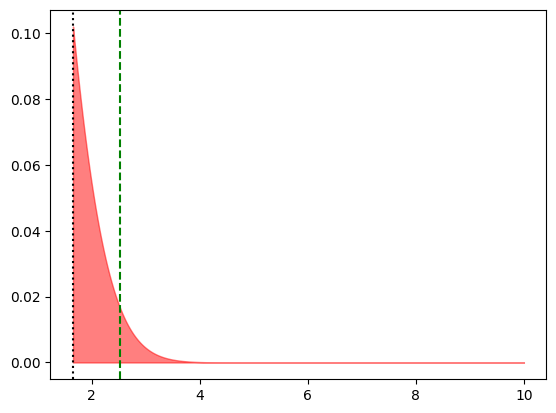

In [11]:
prueba_hipotesis_2muestrasZ(
    x_barra1=121,
    x_barra2=112,
    var1=64,
    var2=64,
    n1=10,
    n2=10,
    alpha=0.05,
    cola='sup',
    delta=0
)


grados de libertad 71.40934541382471
Se rechaza Ho bajo 0.05
puntos críticos -1.9937453117020758 1.9937453117020758
p-valor 0.01361834717409649
Intervalo de confianza: 1.9189167777685814 18.08108322223142
Estadístico: 2.4671758189758446


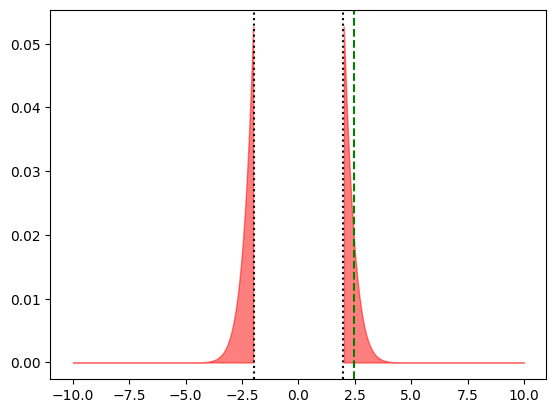

In [12]:
prueba_hipotesis_2muestrasT(
    x_barra1=120,
    x_barra2=110,
    var1=225,
    var2=400,
    n1=35,
    n2=40,
    alpha=0.05,
    cola='dos',
    var='distinta'
)


varianza combinada 13.913043478260871 grados de libertad 23
No se puede rechazar Ho bajo 0.1
puntos críticos -1.7138715277470473 1.7138715277470473
p-valor 0.8438205863476627
Intervalo de confianza: -2.309838959381609 2.9098389593816103
Estadístico: 0.1970088830484559


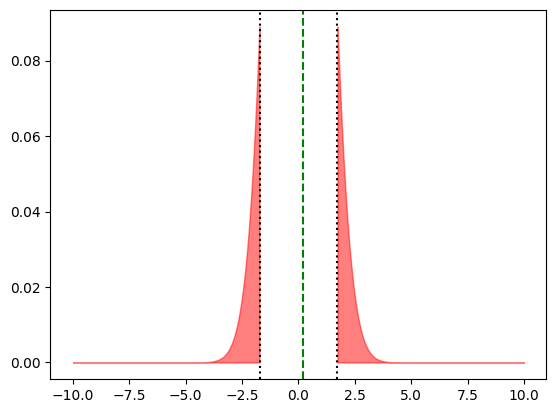

In [13]:
prueba_hipotesis_2muestrasT(
    x_barra1=24.2,
    x_barra2=23.9,
    var1=10,
    var2=20,
    n1=15,
    n2=10,
    alpha=0.10,
    cola='dos',
    var='iguales'
)


No se puede rechazar Ho bajo 0.05
Puntos críticos: -1.959963984540054 1.959963984540054
p-valor: 0.6214016666270081
Intervalo de confianza: -0.024843122967944522 0.014843122967953617
Estadístico: -0.4938647983243456


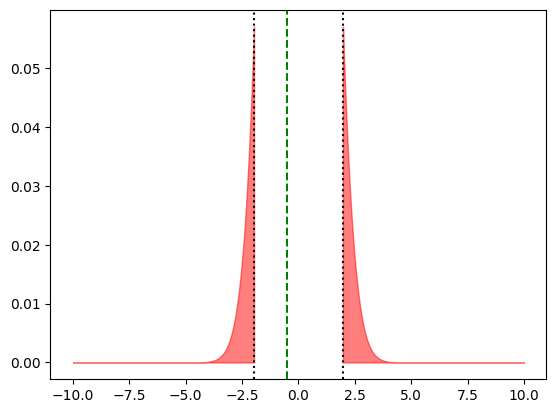

In [14]:
maquina_1 = [16.03, 16.01, 16.02, 16.03, 16.04, 15.96, 15.96, 15.97, 16.04, 15.99]
maquina_2 = [16.05, 15.98, 15.98, 16.03, 16.05, 16.01, 16.05, 15.99, 15.96, 16.00]

# Cálculo de las medias muestrales
media_1 = np.mean(maquina_1)
media_2 = np.mean(maquina_2)

v1 = 0.020**2
v2 = 0.025**2
prueba_hipotesis_2muestrasZ(media_1,media_2,v1,v2,10,10,0.05,'dos',0)

Una fábrica de baterías afirma que la duración promedio de sus baterías es de 50 horas, con una desviación estándar de 5 horas. Un cliente sospecha que la duración real es menor, por lo que toma una muestra de 30 baterías y obtiene un promedio de 48.5 horas.
A un nivel de significancia de 0.05, ¿puede el cliente concluir que la duración es menor a 50 horas?

No se puede rechazar Ho bajo 0.05
punto crítico -1.6448536269514729
p-valor: 0.050174123231145375
beta: 0.9500000000000001
intervalo de confianza 50.00153905879252 46.99846094120748
estadístico -1.6431676725154982


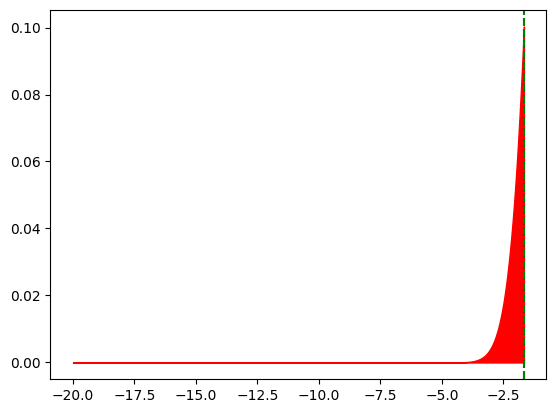

In [15]:
s = 5
n = 30
x_bar = 48.5
mu = 50
a = 0.05
Pruebahipotesis = "U=50" "U<50"
prueba_hipotesis_completa(x_bar,mu,s,30,0.05,'inf',50)

Un investigador quiere comparar el tiempo promedio de espera en dos bancos. Muestra 20 clientes en el Banco A y obtiene un tiempo promedio de 15 min con una desviación estándar de 3 min. En el Banco B, con una muestra de 25 clientes, el tiempo promedio es 13 min con una desviación de 2.5 min.

¿Es significativa la diferencia entre los tiempos de espera a un nivel de 0.01?

varianza combinada 7.465116279069768 grados de libertad 43
No se puede rechazar Ho bajo 0.01
puntos críticos -2.695102079157669 2.695102079157669
p-valor 0.01468711887501728
Intervalo de confianza: -0.20909687966699186 4.209096879666992
Estadístico: 2.4400035181471442


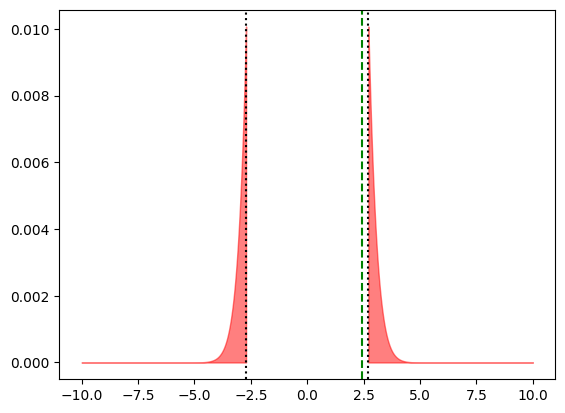

In [16]:
n1 = 20
mu1= 15
var1 = 3**2
n2 = 25
mu2 = 13
var2 = 2.5**2
a = 0.01
prueba_hipotesis_2muestrasT(mu1,mu2,var1,var2,n1,n2,a,'dos',var="iguales")

Un fabricante de bombillas afirma que la duración media de sus productos es de 1200 horas. Un investigador toma una muestra de 40 bombillas y obtiene un promedio de 1150 horas, con una desviación estándar de 100 horas.

A un nivel de significancia de 0.05, ¿puede el investigador concluir que la duración promedio de las bombillas es menor a 1200 horas?

Se rechaza Ho bajo 0.05
punto crítico -1.6448536269514729
p-valor: 0.000782701129001274
beta: 0.9500000000000001
intervalo de confianza 1176.0074193937778 1123.9925806062222
estadístico -3.1622776601683795


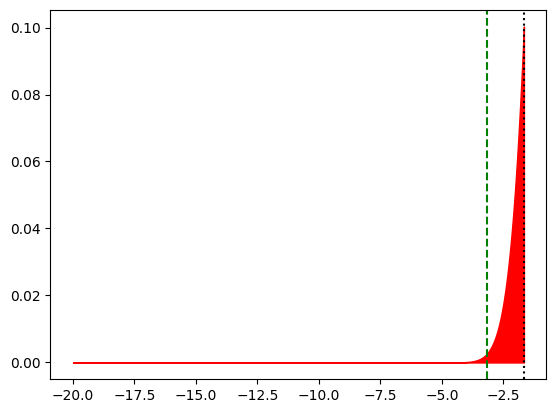

In [17]:
n = 40
mu = 1200
x_bar = 1150
des = 100
a = 0.05
prueba_hipotesis_completa(x_bar,mu,des,n,a,'inf',1200)

Dos grupos de estudiantes realizan un examen de matemáticas. El primer grupo de 25 estudiantes obtiene un puntaje promedio de 78 con una desviación estándar de 8. El segundo grupo de 30 estudiantes obtiene un puntaje promedio de 82 con una desviación estándar de 7.

¿Se puede afirmar, con un nivel de 0.01, que hay una diferencia significativa en los puntajes?

No se puede rechazar Ho bajo 0.01
Puntos críticos: -2.5758293035489004 2.5758293035489004
p-valor: 0.05077801341344612
Intervalo de confianza: -9.274687960465746 1.2746879604657462
Estadístico: -1.953351040179036


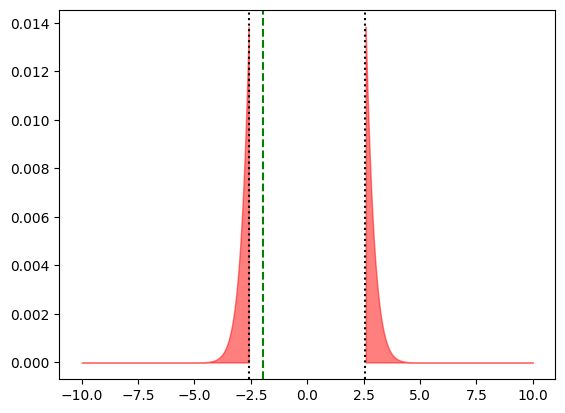

In [18]:
n1 = 25
n2 = 30
u1 = 78
s1 = 8
u2 = 82
s2 = 7
a =0.01
prueba_hipotesis_2muestrasZ(u1,u2,s1**2,s2**2,n1,n2,a,'dos',0)

No se puede rechazar Ho bajo 0.05
Punto crítico: 1.6448536269514722
p-valor: 0.9999999973701791
Intervalo de confianza: 6.795715753464915 8.204284246535085
Estadístico: -5.838742081211422


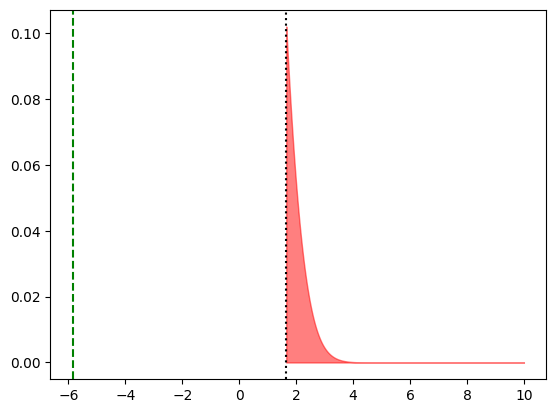

In [19]:
#@title 9-2
v1 = 1
v2 = 1
n1 = 10
n2 = 12
u1 = 162.5
u2 = 155.0
# u1 -u2 = 10
# u1-u2>10
a = 0.05
prueba_hipotesis_2muestrasZ(u1,u2,v1,v2,n1,n2,a,'sup',10)

Se rechaza Ho bajo 0.05
Puntos críticos: -1.959963984540054 1.959963984540054
p-valor: 0.000622283546113156
Intervalo de confianza: 0.08116756903168396 0.2988324309683186
Estadístico: 3.4217112835697088


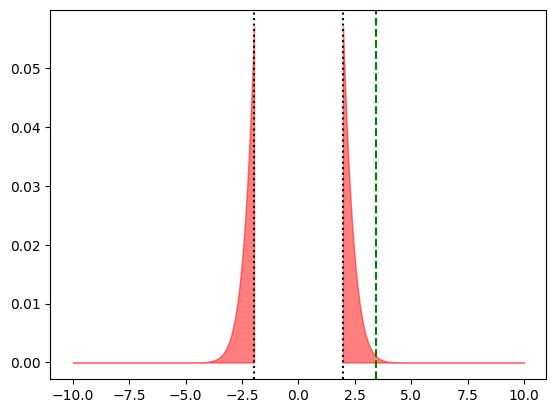

In [20]:
#@title 9-5
s1 = 0.10**2
s2 = 0.15**2
n1 = 12
n2 = 10
x1 = 30.87
x2 = 30.68
a = 0.05
prueba_hipotesis_2muestrasZ(x1,x2,s1,s2,n1,n2,a,'dos',0)

varianza combinada 22.465955555555553 grados de libertad 243
Se rechaza Ho bajo 0.05
punto crítico: 1.651148401773476
p-valor: 0.03280385400221042
Intervalo de confianza: 0.11761404783483642 2.162385952165165
Estadístico: 1.8410945240742909


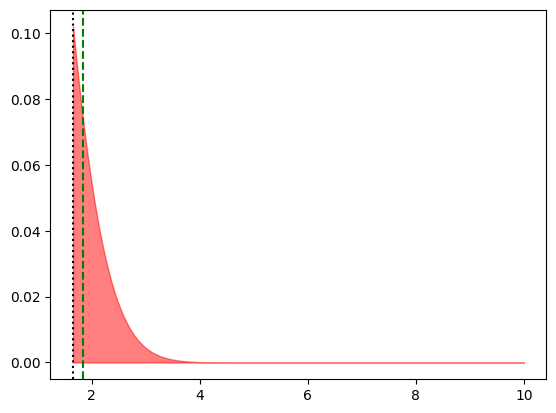

In [21]:
n1 = 97
n2 = 148
a =0.05
x1 = 10.40
x2 = 9.26
s1 = 4.83**2
s2 = 4.68**2
prueba_hipotesis_2muestrasT(x1,x2,s1,s2,n1,n2,a,'sup',var='iguales')

grados de libertad 5.794919743383932
Se rechaza Ho bajo 0.1
punto crítico: 1.4460311994757142
p-valor: 0.010766885150792493
Intervalo de confianza: 11.668953041886704 17.331046958113294
Estadístico: 2.298492569680755


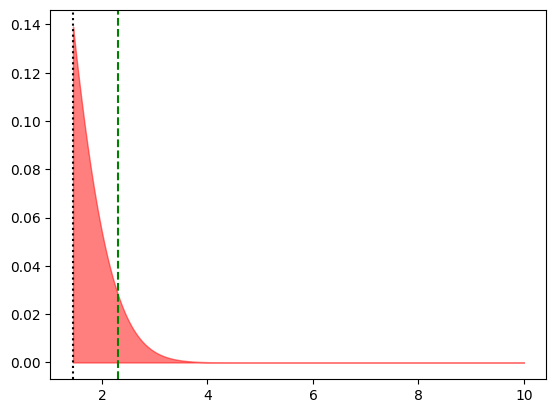

In [22]:
listamj = [29,34,33,27,28,32,31,34,32,27]
listamm = [18,15,23,13,12]
nmj = 10
nmm = 5
mediamj = np.mean(listamj)
mediamm = np.mean(listamm)
varmj = np.var(listamj)
varmm = np.var(listamm)
a = 0.1
prueba_hipotesis_2muestrasT(mediamj,mediamm,varmj,varmm,nmj,nmm,a,'sup',10,'distinta')

### a